In [1]:
import sys
import os
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from pycgp_finalclass.CGP import CGP
from pycgp_finalclass.Config import CGPConfig
from pycgp_finalclass.ES import ES
from pycgp_finalclass.Evaluator import EvaluatorSin, Binary_Classifier
from pycgp_finalclass.Node import Node
from pycgp_finalclass.Mutation import Proba_Mutation, Golden_mutation
from pycgp_finalclass.Function import Func
from pycgp_finalclass.Function_library import *
from pycgp_finalclass.Genome import CGPGenome


In [2]:
def build_funcLib():
    return [Func(f_sum, 'sum', 2, 0),
            Func(f_aminus, 'aminus', 2, 0),
            Func(f_mult, 'mult', 2, 0),
            Func(f_exp, 'exp', 2, 0),
            Func(f_abs, 'abs', 1, 0),
            Func(f_sqrt, 'sqrt', 1, 0),
            Func(f_sqrtxy, 'sqrtxy', 2, 0),
            Func(f_squared, 'squared', 1, 0),
            Func(f_pow, 'pow', 2, 0),
            Func(f_one, 'one', 0, 0),
            Func(f_zero, 'zero', 0, 0),
            #Func(f_const, 'const', 0, 1),
            Func(f_inv, 'inv', 1, 0),
            Func(f_gt, 'gt', 2, 0),
            #Func(f_asin, 'asin', 1, 0),
            #Func(f_acos, 'acos', 1, 0),
            #Func(f_atan, 'atan', 1, 0),
            #Func(f_sin, 'sin', 1, 0),
            Func(f_min, 'min', 2, 0),
            Func(f_max, 'max', 2, 0),
            Func(f_round, 'round', 1, 0),
            Func(f_floor, 'floor', 1, 0),
            Func(f_ceil, 'ceil', 1, 0)
            ]
functions = build_funcLib()

In [3]:
evaluator1 = EvaluatorSin()
print("evaluator_sin.inputs:", evaluator1.inputs)

evaluator_sin.inputs: [-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61

In [4]:
from scipy.io import arff
import pandas as pd

# Load the .arff file
data, meta = arff.loadarff("datasets/Colon_fixed.arff")

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# If string columns are returned as bytes, decode them
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# Replace "relapse" with 1 and "non-relapse" with 0 in the 'Class' column
df['class'] = df['class'].replace({'Tumor': 1, 'Normal': 0})


from sklearn.preprocessing import MinMaxScaler

# Séparation des features et de la cible
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target

# Conversion des colonnes en float
X = X.astype(float)

# Standardisation avec MinMaxScaler dans l'intervalle [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)



C:\Users\pauls\AppData\Local\Temp\ipykernel_11212\2853248603.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Tumor': 1, 'Normal': 0})


In [5]:
evaluator2 = Binary_Classifier(X, y)

In [6]:




# Fix: Use only 1 input for sin function
CGP_config = CGPConfig(num_inputs=1, num_nodes=30, num_outputs=1, input_node_chance=0.4, const_min=-1, const_max=1, function_set=functions)
#For evaluatorsin num_inputs = 1

mutationcgp_proba = Proba_Mutation(CGP_config, number_mutations=10, input_node_mutation_rate=0.2, output_node_mutation_rate=0.1, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1)
mutationcgp_golden = Golden_mutation(CGP_config,input_node_mutation_rate=0.2, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1,output_node_mutation_rate=0.1)

genome_cgp = CGPGenome.create_genome(CGP_config)
active_nodes = genome_cgp.get_active_nodes()
print("Active nodes:", active_nodes)



Active nodes: [<pycgp_finalclass.Node.Node object at 0x0000019F3984B5C0>, <pycgp_finalclass.Node.Node object at 0x0000019F3984B950>]


In [9]:
ES_cgp = ES(evaluator1, mu=1, lam=4,genome_factory=lambda: CGPGenome.create_genome(CGP_config),mutation = mutationcgp_golden)
best_genome = ES_cgp.evolve(n_generations=10000, early_stopping=10000)

print(best_genome.to_function_string())

print("Fitness of best genome:", evaluator1.evaluate(best_genome, 0))
evaluated_fitness = evaluator1.evaluate(best_genome, 0)
print("Re-evaluated fitness: ", evaluated_fitness)




Best fitness achieved: 0.9932
n1 = max(x0, x0)
n2 = zero()
n3 = sum(n2, n1)
n4 = sqrt(n1)
n5 = gt(n3, x0)
n6 = min(n4, n4)
n7 = aminus(n2, n3)
n8 = pow(n3, n7)
n9 = exp(n8, n2)
n10 = inv(n8)
n11 = sum(n10, n1)
n12 = max(n11, n10)
n13 = gt(n6, n12)
n14 = mult(n8, x0)
n15 = abs(n13)
n16 = one()
n17 = floor(n16)
n18 = floor(n17)
n19 = max(n5, n17)
n20 = sum(n14, n5)
n21 = pow(n4, n15)
n22 = sqrtxy(n1, n20)
n23 = mult(n5, n18)
n24 = abs(n18)
n25 = sum(n9, n24)
n26 = sum(n10, n21)
n27 = round(n18)
n28 = abs(n26)
n29 = sqrt(n18)
n30 = exp(x0, n24)
Output: n14 
n1 = max(x0, x0)
n2 = zero()
n3 = sum(n2, n1)
n4 = sqrt(n1)
n5 = gt(n3, x0)
n6 = min(n4, n4)
n7 = aminus(n2, n3)
n8 = pow(n3, n7)
n9 = exp(n8, n2)
n10 = inv(n8)
n11 = sum(n10, n1)
n12 = max(n11, n10)
n13 = gt(n6, n12)
n14 = mult(n8, x0)
n15 = abs(n13)
n16 = one()
n17 = floor(n16)
n18 = floor(n17)
n19 = max(n5, n17)
n20 = sum(n14, n5)
n21 = pow(n4, n15)
n22 = sqrtxy(n1, n20)
n23 = mult(n5, n18)
n24 = abs(n18)
n25 = sum(n9, n24)
n26 = s

n1 = one()
n2 = abs(n1)
n3 = exp(x0, x0)
n4 = inv(n3)
n5 = abs(n4)
n6 = sqrtxy(n2, n3)
n7 = min(n6, n6)
n8 = inv(n1)
n9 = max(n3, n4)
n10 = sum(n1, n6)
n11 = sqrtxy(n10, n5)
n12 = sqrtxy(n9, n3)
n13 = sum(n4, n10)
n14 = sqrtxy(n8, n9)
n15 = min(n9, n7)
n16 = sum(n11, n14)
n17 = max(n8, n5)
n18 = ceil(n14)
n19 = sum(x0, n16)
n20 = sqrt(n13)
n21 = pow(n15, n7)
n22 = floor(n12)
n23 = max(n7, n14)
n24 = squared(n15)
n25 = sqrtxy(n21, n5)
n26 = mult(x0, n10)
n27 = gt(n13, n25)
n28 = ceil(n11)
n29 = abs(n7)
n30 = ceil(n19)
Output: n26 


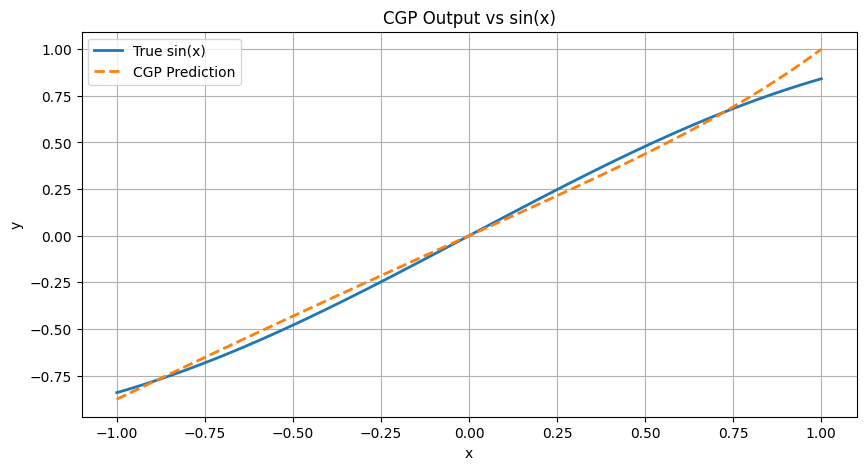

Fitness of best genome: 0.9930707394189586


In [8]:
import matplotlib.pyplot as plt

def plot_sin_vs_prediction(evaluator, genome):
    inputs = evaluator.inputs
    targets = evaluator.targets

    predictions = [genome.get_value([x])[0] for x in inputs]

    plt.figure(figsize=(10, 5))
    plt.plot(inputs, targets, label='True sin(x)', linewidth=2)
    plt.plot(inputs, predictions, label='CGP Prediction', linestyle='--', linewidth=2)
    plt.title('CGP Output vs sin(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
print(best_genome.to_function_string())
plot_sin_vs_prediction(evaluator1, best_genome)
print(f"Fitness of best genome: {evaluator1.evaluate(best_genome, generation=0)}")
